In [3]:
import pandas as pd
import os
import glob


In [8]:
base_dir=r'C:\Users\prabh\OneDrive\Desktop\Data_Analysis_Using_Pandas_And_Matplotlib\data'

for subfolder1 in os.listdir(base_dir):
    subfolder1_path=os.path.join(base_dir,subfolder1)
    dataframes = []
    
    if os.path.isdir(subfolder1_path):
        for subfolder in os.listdir(subfolder1_path):
            subfolder_path = os.path.join(subfolder1_path, subfolder)
            
            
            if os.path.isdir(subfolder_path):
                for file_name in os.listdir(subfolder_path):
                    file_path = os.path.join(subfolder_path, file_name)
                    
                    
                    if os.path.isfile(file_path):
                        
                        df = pd.read_csv(file_path)  
                        dataframes.append(df)

    combined_df = pd.concat(dataframes, ignore_index=True)

    folder_path =   r'C:\Users\prabh\OneDrive\Desktop\Data_Analysis_Using_Pandas_And_Matplotlib\Combined_data'
    combined_file_path=os.path.join(folder_path,subfolder1)

    combined_df.to_csv(combined_file_path, index=False)

In [10]:
file1_path = r'C:\Users\prabh\OneDrive\Desktop\Data_Analysis_Using_Pandas_And_Matplotlib\Combined_data\GHI'
file2_path = r'C:\Users\prabh\OneDrive\Desktop\Data_Analysis_Using_Pandas_And_Matplotlib\Combined_data\PR'


df1 = pd.read_csv(file1_path)
df2 = pd.read_csv(file2_path)


merged_df = pd.merge(df1, df2, on='Date', how='inner')
folder_path=r'C:\Users\prabh\OneDrive\Desktop\Data_Analysis_Using_Pandas_And_Matplotlib'
combined_files_path=os.path.join(folder_path,'Combined_file.csv')
merged_df.to_csv(combined_files_path, index=False)


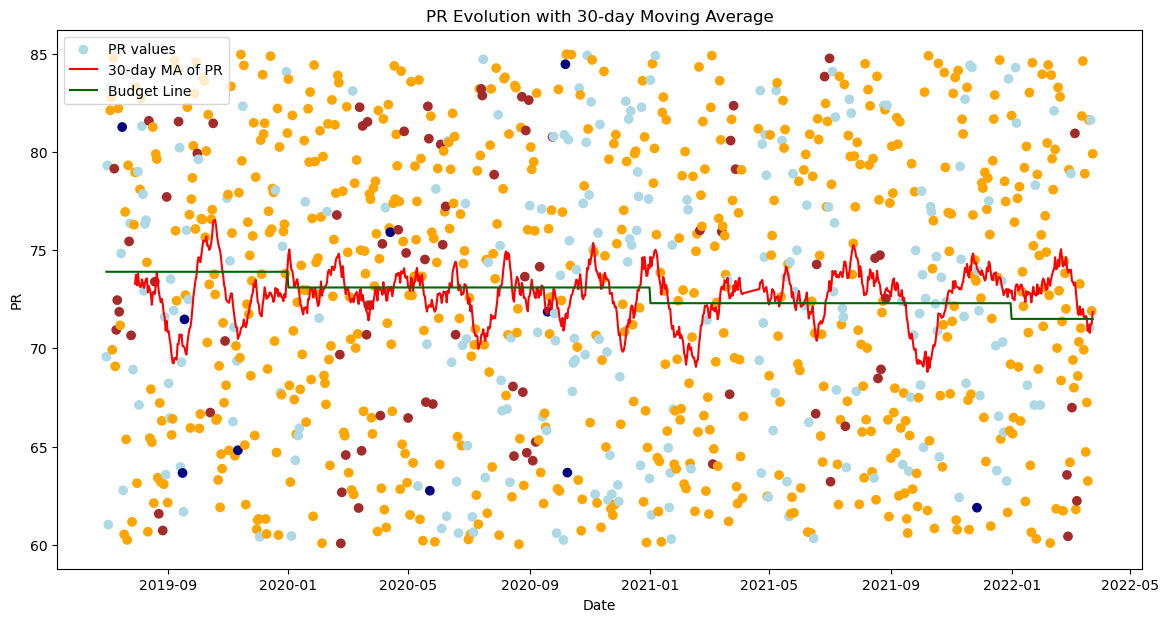

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def generate_graph(input_file):
    # Load the preprocessed data
    df = pd.read_csv(input_file)
    
    # Convert Date column to datetime
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Calculate the 30-day moving average for PR
    df['PR_MA_30'] = df['PR'].rolling(window=30).mean()
    
    # Define the budget line
    start_year = df['Date'].dt.year.min()
    df['Budget'] = 73.9 - 0.8 * (df['Date'].dt.year - start_year)
    
    # Scatter plot with GHI-based color coding
    colors = df['GHI'].apply(lambda x: 'navy' if x < 2 else 'lightblue' if 2 <= x < 4 else 'orange' if 4 <= x < 6 else 'brown')
    
    plt.figure(figsize=(14, 7))
    plt.scatter(df['Date'], df['PR'], c=colors, label='PR values')
    plt.plot(df['Date'], df['PR_MA_30'], color='red', label='30-day MA of PR')
    plt.plot(df['Date'], df['Budget'], color='darkgreen', label='Budget Line')
    
    # Adding legends, labels, and title
    plt.xlabel('Date')
    plt.ylabel('PR')
    plt.title('PR Evolution with 30-day Moving Average')
    plt.legend()
    
    plt.show()

# Example usage:
generate_graph('Combined_file.csv')
